## ESG_T Prediction - Surpervised Classification Model

- Research Framework 
- 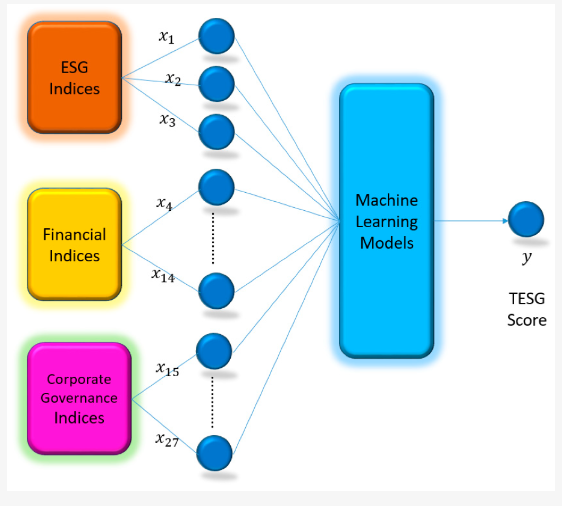
- Source: Lin, H.-Y.; Hsu, B.-W. Empirical Study of ESG Score Prediction through Machine Learning—A Case of Non-Financial Companies in Taiwan. Sustainability 2023, 15, 14106. https://doi.org/10.3390/su151914106




### 1) Entire Sample Period 
 - Cutoff point : Median of ESG_T

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in the data

df = pd.read_csv("ESG_PROJECT_1130.csv")
df.columns, df.shape

(Index(['SYMBOL', 'CORP', 'FIC_CODE', 'YEAR', 'QUARTER', 'QUARTER_ID',
        'MISSING_ESG', 'ESG_T', 'ESG_E', 'ESG_S', 'ESG_G', 'FOREIGN_HOLDING',
        'DE_RATIO', 'BORROWING_RATE_AVG', 'CF_TA_RATIO',
        'RESERVES_EQUITY_RATIO', 'REV_GR_YOY', 'TA_GR_YOY', 'GPM', 'ROA',
        'EPS_ADJ', 'TA', 'TOT_DEBT', 'TOT_EQUITY', 'SALES', 'LOG_MKCAP', 'BTM',
        'TOBIN_Q', 'EXCESSRET_LEAD', 'REALIZED_VOLATILITY', 'VOL_VOLATILITY',
        'RETURN_STD'],
       dtype='object'),
 (33175, 32))

In [2]:
#drop if MISSING_ESG ==1
df = df[df['MISSING_ESG'] != 1]
#drop na
df = df.dropna()
df.shape

(12526, 32)

In [3]:
#target variable = 'ESG_T' as y
y = df['ESG_T']
# x feature without 'SYMBOL', 'CORP', 'FIC_CODE','YEAR', 'QUARTER', 'QUARTER_ID','MISSING_ESG', TA', 'TOT_DEBT', 'TOT_EQUITY', 'SALES','EXCESSRET_LEAD'
x = df.drop(['SYMBOL', 'CORP', 'FIC_CODE', 'QUARTER', 'QUARTER_ID','MISSING_ESG', 'TA', 'TOT_DEBT', 'TOT_EQUITY', 'SALES','EXCESSRET_LEAD','ESG_T'], axis=1)
#one hot encoding for 'YEAR'
x = pd.get_dummies(x, columns=['YEAR'])

#split train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=123)


## 1-1 Logistic Regression 

In [4]:
#Logistic Regression Model with cutoff at median
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, auc, average_precision_score

#y = 1 if ESG_T > median, y = 0 if ESG_T <= median
y_train = np.where(y_train > np.median(y_train), 1, 0)
y_test = np.where(y_test > np.median(y_test), 1, 0)

#fit logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
y_pred_prob = logreg.predict_proba(x_test)[:,1]

#confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1979  102]
 [ 138  913]]
              precision    recall  f1-score   support

           0       0.93      0.95      0.94      2081
           1       0.90      0.87      0.88      1051

    accuracy                           0.92      3132
   macro avg       0.92      0.91      0.91      3132
weighted avg       0.92      0.92      0.92      3132



c:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


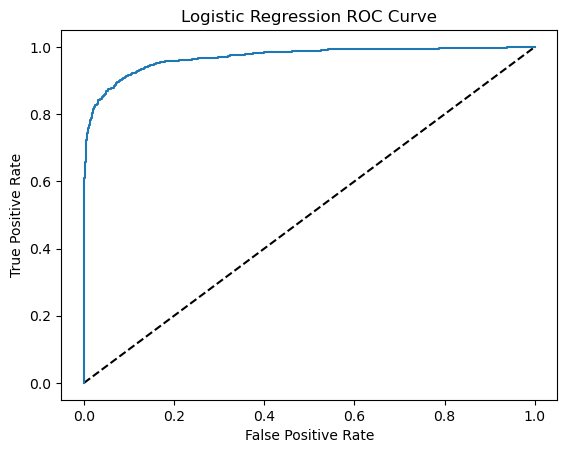

In [5]:
#ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr, tpr, label='Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()


## 1-2 Random Forest Classficiation

In [6]:
#Random Forest Model with cutoff at median
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

#fit random forest model
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
y_pred_prob = rf.predict_proba(x_test)[:,1]

#confusion matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[2052   29]
 [  24 1027]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2081
           1       0.97      0.98      0.97      1051

    accuracy                           0.98      3132
   macro avg       0.98      0.98      0.98      3132
weighted avg       0.98      0.98      0.98      3132



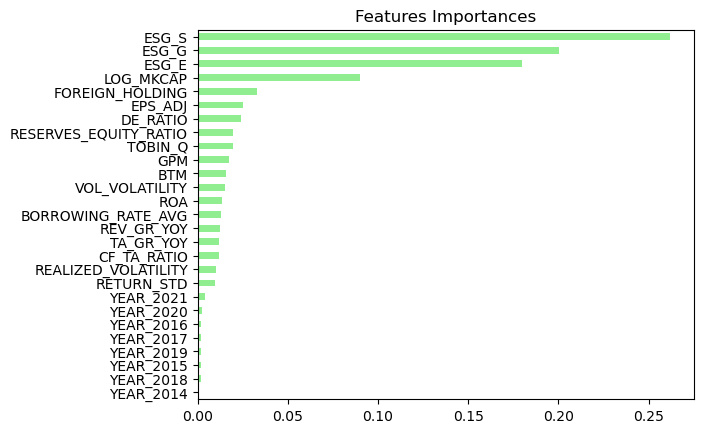

In [7]:
#Feature Importance
importances = pd.Series(data=rf.feature_importances_, index=x_train.columns)
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()


## Subsample Analysis - Pre-pandemic vs. Pandemic Period 

In [8]:
#Pre-Pandemic vs Pandemic
y_pre_pandemic = df[df['YEAR'] < 2020]['ESG_T']
y_pandemic = df[df['YEAR'] >= 2020]['ESG_T']

x_pre_pandemic = df[df['YEAR'] < 2020].drop(['SYMBOL', 'CORP', 'FIC_CODE', 'QUARTER', 'QUARTER_ID','MISSING_ESG', 'TA', 'TOT_DEBT', 'TOT_EQUITY', 'SALES','EXCESSRET_LEAD','ESG_T'], axis=1)
x_pre_pandemic = pd.get_dummies(x_pre_pandemic, columns=['YEAR'])
x_pandemic = df[df['YEAR'] >= 2020].drop(['SYMBOL', 'CORP', 'FIC_CODE', 'QUARTER', 'QUARTER_ID','MISSING_ESG', 'TA', 'TOT_DEBT', 'TOT_EQUITY', 'SALES','EXCESSRET_LEAD','ESG_T'], axis=1)
x_pandemic = pd.get_dummies(x_pandemic, columns=['YEAR'])

x_train_pre_pandemic, x_test_pre_pandemic, y_train_pre_pandemic, y_test_pre_pandemic = train_test_split(x_pre_pandemic,y_pre_pandemic, random_state=123)
x_train_pandemic, x_test_pandemic, y_train_pandemic, y_test_pandemic = train_test_split(x_pandemic,y_pandemic, random_state=123)

#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_pre_pandemic = scaler.fit_transform(x_train_pre_pandemic)
x_test_pre_pandemic = scaler.transform(x_test_pre_pandemic)
x_train_pandemic = scaler.fit_transform(x_train_pandemic)
x_test_pandemic = scaler.transform(x_test_pandemic)

#Logistic Regression Model with cutoff at median
#y = 1 if ESG_T > median, y = 0 if ESG_T <= median
y_train_pre_pandemic = np.where(y_train_pre_pandemic > np.median(y_train_pre_pandemic), 1, 0)
y_test_pre_pandemic = np.where(y_test_pre_pandemic > np.median(y_test_pre_pandemic), 1, 0)
y_train_pandemic = np.where(y_train_pandemic > np.median(y_train_pandemic), 1, 0)
y_test_pandemic = np.where(y_test_pandemic > np.median(y_test_pandemic), 1, 0)

#fit logistic regression model
logreg = LogisticRegression()
logreg.fit(x_train_pre_pandemic, y_train_pre_pandemic)
y_pred = logreg.predict(x_test_pre_pandemic)
y_pred_prob = logreg.predict_proba(x_test_pre_pandemic)[:,1]
logreg.fit(x_train_pandemic, y_train_pandemic)
y_pred_pandemic = logreg.predict(x_test_pandemic)
y_pred_prob_pandemic = logreg.predict_proba(x_test_pandemic)[:,1]

#report classification report for pre-pandemic vs pandemic
print('Pre-Pandemic')
print(confusion_matrix(y_test_pre_pandemic, y_pred))
print(classification_report(y_test_pre_pandemic, y_pred))
print('Pandemic')
print(confusion_matrix(y_test_pandemic, y_pred_pandemic))
print(classification_report(y_test_pandemic, y_pred_pandemic))


Pre-Pandemic
[[1312   43]
 [  41  523]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1355
           1       0.92      0.93      0.93       564

    accuracy                           0.96      1919
   macro avg       0.95      0.95      0.95      1919
weighted avg       0.96      0.96      0.96      1919

Pandemic
[[719  29]
 [ 27 438]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       748
           1       0.94      0.94      0.94       465

    accuracy                           0.95      1213
   macro avg       0.95      0.95      0.95      1213
weighted avg       0.95      0.95      0.95      1213



In [21]:

# RF Model with cutoff at median
#y = 1 if ESG_T > median, y = 0 if ESG_T <= median
y_train_pre_pandemic = np.where(y_train_pre_pandemic > np.median(y_train_pre_pandemic), 1, 0)
y_test_pre_pandemic = np.where(y_test_pre_pandemic > np.median(y_test_pre_pandemic), 1, 0)
y_train_pandemic = np.where(y_train_pandemic > np.median(y_train_pandemic), 1, 0)
y_test_pandemic = np.where(y_test_pandemic > np.median(y_test_pandemic), 1, 0)
#scale data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_pre_pandemic = scaler.fit_transform(x_train_pre_pandemic)
x_test_pre_pandemic = scaler.transform(x_test_pre_pandemic)
x_train_pandemic = scaler.fit_transform(x_train_pandemic)
x_test_pandemic = scaler.transform(x_test_pandemic)

#fit random forest model
rf = RandomForestClassifier( random_state=123)
rf.fit(x_train_pre_pandemic, y_train_pre_pandemic)
y_pred = rf.predict(x_test_pre_pandemic)
y_pred_prob = rf.predict_proba(x_test_pre_pandemic)[:,1]
rf.fit(x_train_pandemic, y_train_pandemic)
y_pred_pandemic = rf.predict(x_test_pandemic)
y_pred_prob_pandemic = rf.predict_proba(x_test_pandemic)[:,1]
#report classification report for pre-pandemic vs pandemic
print('Pre-Pandemic')
print(confusion_matrix(y_test_pre_pandemic, y_pred))
print(classification_report(y_test_pre_pandemic, y_pred))
print('Pandemic')
print(confusion_matrix(y_test_pandemic, y_pred_pandemic))
print(classification_report(y_test_pandemic, y_pred_pandemic))

Pre-Pandemic
[[1346    9]
 [  12  552]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1355
           1       0.98      0.98      0.98       564

    accuracy                           0.99      1919
   macro avg       0.99      0.99      0.99      1919
weighted avg       0.99      0.99      0.99      1919

Pandemic
[[739   9]
 [ 20 445]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       748
           1       0.98      0.96      0.97       465

    accuracy                           0.98      1213
   macro avg       0.98      0.97      0.97      1213
weighted avg       0.98      0.98      0.98      1213



In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

# Define a function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Read in the data
df = pd.read_csv("ESG_PROJECT_1130.csv")

# Data preprocessing based on the provided steps
df = df[df['MISSING_ESG'] != 1]
df = df.dropna()

# Define the target variable and feature set
y = df['ESG_T']
X = df.drop(['SYMBOL', 'CORP', 'FIC_CODE', 'QUARTER', 'QUARTER_ID', 'MISSING_ESG', 
             'TA', 'TOT_DEBT', 'TOT_EQUITY', 'SALES', 'EXCESSRET_LEAD', 'ESG_T'], axis=1)
X = pd.get_dummies(X, columns=['YEAR'])


# Split the dataset for entire period, pre-pandemic, and pandemic
entire_period_data = df
pre_pandemic_data = df[df['YEAR'] < 2020]
pandemic_data = df[df['YEAR'] >= 2020]

# Initialize the result dictionary
results = {
    'Entire Period': {},
    'Pre-Pandemic': {},
    'Pandemic': {}
}

# Define the models
models = {
    'ELM': MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam', max_iter=10000),
    'SVM': SVR(),
    'RF': RandomForestRegressor(),
    'XGBoost': XGBRegressor()
}

# Train and evaluate models
for period, data in zip(results.keys(), [entire_period_data, pre_pandemic_data, pandemic_data]):
    # Split the data
    y_period = data['ESG_T']
    X_period = data.drop(['SYMBOL', 'CORP', 'FIC_CODE', 'QUARTER', 'QUARTER_ID', 'MISSING_ESG', 
             'TA', 'TOT_DEBT', 'TOT_EQUITY', 'SALES', 'EXCESSRET_LEAD', 'ESG_T'], axis=1)
    
    # Scale the features
    scaler = StandardScaler()
    X_period_scaled = scaler.fit_transform(X_period)
    # Split into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_period_scaled, y_period, random_state=123, test_size=0.3)
    
    # Train and evaluate each model
    for model_name, model in models.items():
        # Fit model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        
        # Calculate metrics
        results[period][model_name] = {
            'Training': {
                'RMSE': np.sqrt(mean_squared_error(y_train, y_pred_train)),
                'MAE': mean_absolute_error(y_train, y_pred_train),
                'MAPE': mean_absolute_percentage_error(y_train, y_pred_train),
                'r^2': r2_score(y_train, y_pred_train)
            },
            'Testing': {
                'RMSE': np.sqrt(mean_squared_error(y_test, y_pred_test)),
                'MAE': mean_absolute_error(y_test, y_pred_test),
                'MAPE': mean_absolute_percentage_error(y_test, y_pred_test),
                'r^2': r2_score(y_test, y_pred_test)
            }
        }


# Format the results
formatted_results = {}

for period, models_metrics in results.items():
    formatted_results[period] = {}
    for model_name, metrics in models_metrics.items():
        formatted_results[period][model_name] = {}
        for split, split_metrics in metrics.items():
            for metric, value in split_metrics.items():
                formatted_results[period][model_name][f'{split} {metric}'] = value

# Print the formatted results
for period, model_metrics in formatted_results.items():
    print(f"Results for {period}:")
    for model, metrics in model_metrics.items():
        print(f"  {model}:")
        for metric, value in metrics.items():
            print(f"    {metric}: {value:.4f}")
    print()


Results for Entire Period:
  ELM:
    Training RMSE: 0.1670
    Training MAE: 0.1154
    Training MAPE: 8.1479
    Training r^2: 0.9521
    Testing RMSE: 0.2139
    Testing MAE: 0.1488
    Testing MAPE: 10.4872
    Testing r^2: 0.9211
  SVM:
    Training RMSE: 0.1922
    Training MAE: 0.1284
    Training MAPE: 8.9427
    Training r^2: 0.9366
    Testing RMSE: 0.2295
    Testing MAE: 0.1565
    Testing MAPE: 10.7764
    Testing r^2: 0.9092
  RF:
    Training RMSE: 0.0538
    Training MAE: 0.0180
    Training MAPE: 1.2451
    Training r^2: 0.9950
    Testing RMSE: 0.1399
    Testing MAE: 0.0486
    Testing MAPE: 3.4184
    Testing r^2: 0.9662
  XGBoost:
    Training RMSE: 0.0478
    Training MAE: 0.0270
    Training MAPE: 1.9736
    Training r^2: 0.9961
    Testing RMSE: 0.1526
    Testing MAE: 0.0759
    Testing MAPE: 5.4228
    Testing r^2: 0.9598

Results for Pre-Pandemic:
  ELM:
    Training RMSE: 0.1503
    Training MAE: 0.1055
    Training MAPE: 7.7657
    Training r^2: 0.9526
    

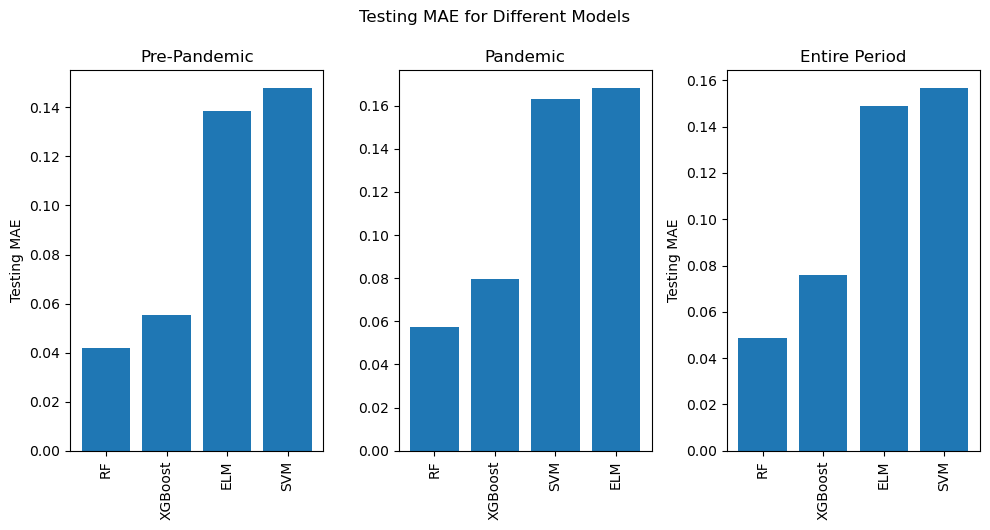

In [44]:
# Plot the MAE results comparing the models : ELM, SVM, RF, XGBoost for pre-pandemic and pandemic and entire period
#sort the results by testing MAE
formatted_results['Pre-Pandemic'] = {k: v for k, v  in sorted(formatted_results['Pre-Pandemic'].items(), key=lambda item: item[1]['Testing MAE'])}
formatted_results['Pandemic'] = {k: v for k, v  in sorted(formatted_results['Pandemic'].items(), key=lambda item: item[1]['Testing MAE'])}
formatted_results['Entire Period'] = {k: v for k, v  in sorted(formatted_results['Entire Period'].items(), key=lambda item: item[1]['Testing MAE'])}

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(formatted_results['Pre-Pandemic'].keys(), [formatted_results['Pre-Pandemic'][model]['Testing MAE'] for model in formatted_results['Pre-Pandemic'].keys()])
plt.xticks(rotation=90)
plt.title('Pre-Pandemic')
plt.ylabel('Testing MAE')
plt.subplot(1, 3, 2)
plt.bar(formatted_results['Pandemic'].keys(), [formatted_results['Pandemic'][model]['Testing MAE'] for model in formatted_results['Pandemic'].keys()])
plt.xticks(rotation=90)
plt.title('Pandemic')
# entire period
plt.subplot(1, 3, 3)
plt.bar(formatted_results['Entire Period'].keys(), [formatted_results['Entire Period'][model]['Testing MAE'] for model in formatted_results['Entire Period'].keys()])
plt.xticks(rotation=90)
plt.title('Entire Period')
plt.ylabel('Testing MAE')
plt.tight_layout()
#title for the entire figure with distance between subplots adjusted
plt.suptitle('Testing MAE for Different Models', y=1.05)
plt.show()


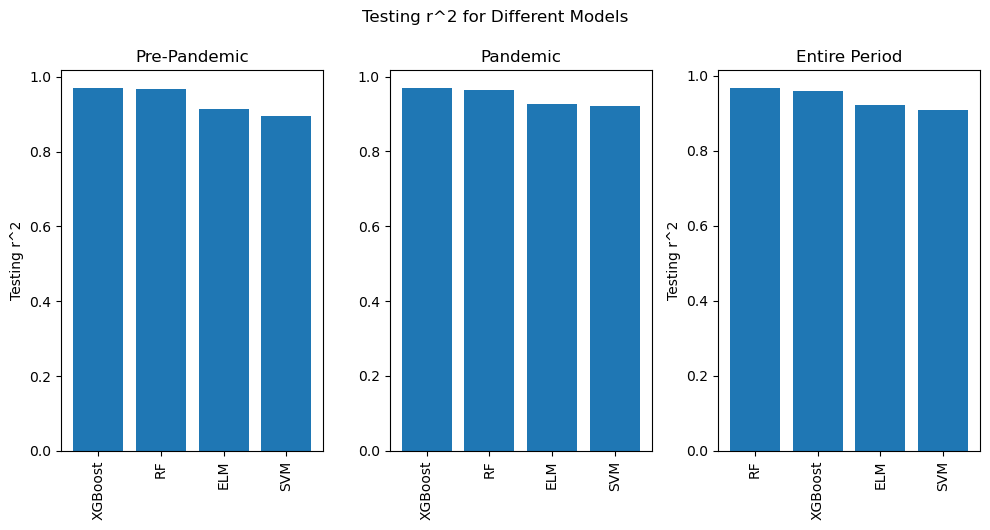

In [45]:
#R^2 for pre-pandemic and pandemic and entire period
#sort formatted_results by testing r^2
formatted_results['Pre-Pandemic'] = {k: v for k, v in sorted(formatted_results['Pre-Pandemic'].items(), key=lambda item: item[1]['Testing r^2'], reverse=True)}
formatted_results['Pandemic'] = {k: v for k, v in sorted(formatted_results['Pandemic'].items(), key=lambda item: item[1]['Testing r^2'], reverse=True)}
formatted_results['Entire Period'] = {k: v for k, v in sorted(formatted_results['Entire Period'].items(), key=lambda item: item[1]['Testing r^2'], reverse=True)}

plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(formatted_results['Pre-Pandemic'].keys(), [formatted_results['Pre-Pandemic'][model]['Testing r^2'] for model in formatted_results['Pre-Pandemic'].keys()])
plt.xticks(rotation=90)
plt.title('Pre-Pandemic')
plt.ylabel('Testing r^2')
plt.subplot(1, 3, 2)
plt.bar(formatted_results['Pandemic'].keys(), [formatted_results['Pandemic'][model]['Testing r^2'] for model in formatted_results['Pandemic'].keys()])
plt.xticks(rotation=90)
plt.title('Pandemic')
# entire period
plt.subplot(1, 3, 3)
plt.bar(formatted_results['Entire Period'].keys(), [formatted_results['Entire Period'][model]['Testing r^2'] for model in formatted_results['Entire Period'].keys()])
plt.xticks(rotation=90)
plt.title('Entire Period')
plt.ylabel('Testing r^2')
plt.tight_layout()
#title for the entire figure with distance between subplots adjusted
plt.suptitle('Testing r^2 for Different Models', y=1.05)
plt.show()


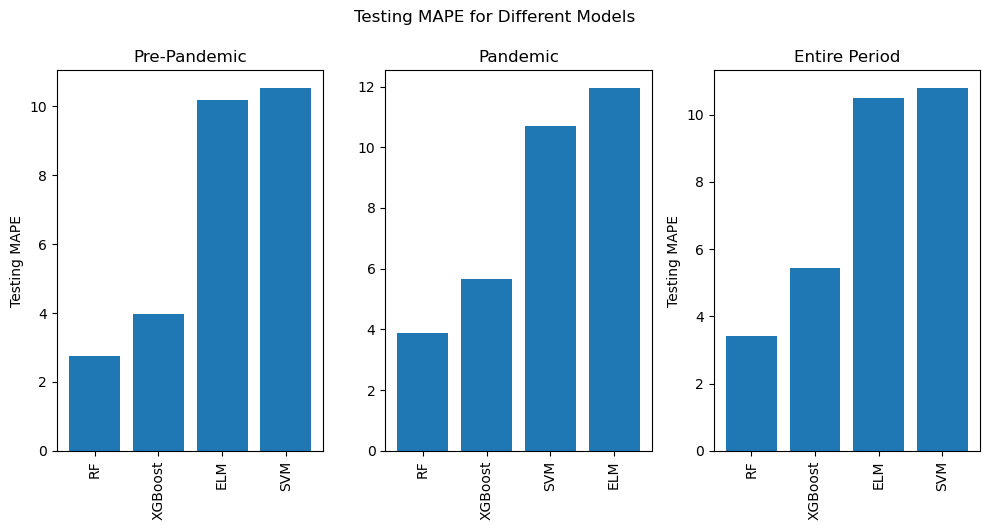

In [46]:
#Compare the performance of the models for pre-pandemic and pandemic and entire period
#sort formatted_results by Testing MAPE
formatted_results['Pre-Pandemic'] = {k: v for k, v in sorted(formatted_results['Pre-Pandemic'].items(), key=lambda item: item[1]['Testing MAPE'])}
formatted_results['Pandemic'] = {k: v for k, v in sorted(formatted_results['Pandemic'].items(), key=lambda item: item[1]['Testing MAPE'])}
formatted_results['Entire Period'] = {k: v for k, v in sorted(formatted_results['Entire Period'].items(), key=lambda item: item[1]['Testing MAPE'])}


plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.bar(formatted_results['Pre-Pandemic'].keys(), [formatted_results['Pre-Pandemic'][model]['Testing MAPE'] for model in formatted_results['Pre-Pandemic'].keys()])
plt.xticks(rotation=90)
plt.title('Pre-Pandemic')
plt.ylabel('Testing MAPE')
plt.subplot(1, 3, 2)
plt.bar(formatted_results['Pandemic'].keys(), [formatted_results['Pandemic'][model]['Testing MAPE'] for model in formatted_results['Pandemic'].keys()])
plt.xticks(rotation=90)
plt.title('Pandemic')
# entire period
plt.subplot(1, 3, 3)
plt.bar(formatted_results['Entire Period'].keys(), [formatted_results['Entire Period'][model]['Testing MAPE'] for model in formatted_results['Entire Period'].keys()])
plt.xticks(rotation=90)
plt.title('Entire Period')
plt.ylabel('Testing MAPE')
plt.tight_layout()
#title for the entire figure with distance between subplots adjusted
plt.suptitle('Testing MAPE for Different Models', y=1.05)

plt.show()
